# Audio data

We need to first get a better understanding of our audio data. Here, we'll look at some key concepts and features of audio data.

An audio signal is the vibration generated when sound passes through air.  For audio, when sound is captured from a microphone, it's in analog form.  The analog sound is converted to digital sound format by sampling at consistent intervals of time. The number of audio data points recorded every second is called the *sample rate*. 

- The higher the sample rate, the higher the quality of the sound. However, after a certain point, the human ear can't detect the difference. 
- The average sound sample rate is 48 kilohertz (KHz) or 48,000 samples per second. The dataset we'll be using in this module was sampled at 16 KHz, so our sample rate is 16,000.

我们需要首先更好地了解我们的音频数据。 在这里，我们将了解音频数据的一些关键概念和特征。

音频信号是声音在空气中传播时产生的振动。 对于音频，当从麦克风捕获声音时，它是模拟形式的。 通过以一致的时间间隔采样，将模拟声音转换为数字声音格式。 每秒记录的音频数据点数称为*采样率*。

- 采样率越高，声音质量越高。 然而，在某一点之后，人耳无法察觉差异。
- 平均声音采样率为 48 千赫 (KHz) 或每秒 48,000 个样本。 我们将在本模块中使用的数据集以 16 KHz 的频率采样，因此我们的采样率为 16,000。

<img alt="Diagram that shows an audio sound wave." src="images/2-understand-audio-data-1.png" align="middle" />

When the audio is sampled, the *frequency* of the sound is the number of times per second that a sound wave repeats itself. The *amplitude* is how loud the audio is. We can take our sample rate and frequency, and represent the signal visually. This visual signal can be represented as a *waveform*, which is the signal representation over time in a graphical format. The audio can be recorded in different channels. For example, stereo recordings have two channels, right and left.

Now let's take a moment to understand how we might want to parse out a file. For example, if you have longer audio files, you might want to split it out into frames, or sections, of the audio to be classified individually. For this dataset, we don't need to set any frames of our audio samples, because each sample is only one second and one word. Another processing step might be an *offset*, which means the number of frames from the start of the file to begin data loading.

当音频被采样时，声音的*频率*是声波每秒重复自身的次数。 *amplitude* 是音频的音量。 我们可以采用我们的采样率和频率，并直观地表示信号。 这种视觉信号可以表示为*波形*，它是随时间变化的信号以图形格式表示。 音频可以记录在不同的通道中。 例如，立体声录音有左右两个声道。

现在让我们花点时间了解我们可能希望如何解析文件。 例如，如果您有较长的音频文件，您可能希望将其拆分为音频的帧或部分以单独分类。 对于这个数据集，我们不需要设置音频样本的任何帧，因为每个样本只有一秒钟和一个单词。 另一个处理步骤可能是 *offset*，这意味着从文件开始到开始数据加载的帧数。


## Get set up with TorchAudio

TorchAudio is a library that is part of the PyTorch ecosystem. It has I/O functionality, popular open datasets, and common audio transformations that we'll need to build our model. We will use this library to work with our audio data.

Let's get started! First, we'll import the packages needed:

TorchAudio 是属于 PyTorch 生态系统一部分的库。 它具有我们构建模型所需的 I/O 功能、流行的开放数据集和常见的音频转换。 我们将使用这个库来处理我们的音频数据。

让我们开始吧！ 首先，我们将导入所需的包：

In [ ]:
!pip install -r https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/audio-pytorch/install-packages.txt

In [1]:
# import the packages
import os
import torchaudio
import IPython.display as ipd
import matplotlib.pyplot as plt

## Get the speech commands dataset

PyTorch has a variety of sample datasets available, which is helpful when you're trying to learn and play around with different audio models. We will use the speech commands sample dataset, and download the full dataset in a local directory. Note that we're only using the `yes` and `no` classes to create a binary classification model. 

PyTorch 有各种可用的示例数据集，这在您尝试学习和尝试不同的音频模型时很有帮助。 我们将使用语音命令示例数据集，并在本地目录中下载完整的数据集。 请注意，我们仅使用`是`和`否`类来创建二元分类模型。

### Create a data folder

In [2]:
default_dir = os.getcwd()
folder = 'data'
print(f'Data directory will be: {default_dir}/{folder}')

if os.path.isdir(folder):
    print("Data folder exists.")
else:
    print("Creating folder.")
    os.mkdir(folder) 

Data directory will be: /learn/data
Data folder exists.


### Download the dataset to the data folder

We'll use `torchaudio` to download the dataset files to a local folder.  PyTorch provides multiple sample image, text, and audio datasets. We'll be using the `SPEECHCOMMANDS` dataset from the `torchaudio` library.

我们将使用 `torchaudio` 将数据集文件下载到本地文件夹。 PyTorch 提供了多个示例图像、文本和音频数据集。 我们将使用 `torchaudio` 库中的 `SPEECHCOMMANDS` 数据集。

In [3]:
trainset_speechcommands = torchaudio.datasets.SPEECHCOMMANDS(f'./{folder}/', download=True)


### Visualize the classes available in the dataset

There are 36 audio classes in the speech commands dataset, each sampled at 16 KHz. Let's print the different commands available. The two classes we'll be using are the `yes` and `no` commands.

语音命令数据集中有 36 个音频类，每个以 16 KHz 采样。 让我们打印可用的不同命令。 我们将使用的两个类是 `yes` 和 `no` 命令。

In [ ]:
os.chdir(f'./{folder}/SpeechCommands/speech_commands_v0.02/')
labels = [name for name in os.listdir('.') if os.path.isdir(name)]
# back to default directory
os.chdir(default_dir)
print(f'Total Labels: {len(labels)} \n')
print(f'Label Names: {labels}')

## Convert the sound to tensor

You likely have used a wave file before. It's one format in which we save our digital representation of our analog audio to be shared and played. The speech commands dataset that we will be using in this tutorial is stored in wave files that are all one second or less.

Let's load up one of the wave files and take a look at how the tensors for the `waveform` look. We're loading the files by using `torchaudio.load`, which loads an audio file into a `torch.Tensor` object. TorchAudio takes care of the implementation, so you don't need to worry about it. The `torch.load` function returns the waveform as a tensor, and an `int` of the `sample_rate`. 

您之前可能使用过波形文件。 这是我们保存要共享和播放的模拟音频的数字表示的一种格式。 我们将在本教程中使用的语音命令数据集存储在一秒或更短的波形文件中。

让我们加载一个波形文件，看看`波形`的张量是什么样子的。 我们使用 `torchaudio.load` 加载文件，它将音频文件加载到 `torch.Tensor` 对象中。 TorchAudio 负责实施，因此您无需担心。 `torch.load` 函数返回波形作为张量，以及 `sample_rate` 的 `int`。

In [ ]:
filename = "./data/SpeechCommands/speech_commands_v0.02/yes/00f0204f_nohash_0.wav"
waveform, sample_rate = torchaudio.load(filepath=filename, num_frames=3)
print(f'waveform tensor with 3 frames:  {waveform} \n')
waveform, sample_rate = torchaudio.load(filepath=filename, num_frames=3, frame_offset =2)
print(f'waveform tensor with 2 frame_offsets: {waveform} \n')
waveform, sample_rate = torchaudio.load(filepath=filename)
print(f'waveform tensor:  {waveform}' )

## Plot the waveform

Next, create a `plot_audio` function to display the waveform, and listen to a sample of each class.

接下来，创建一个 `plot_audio` 函数来显示波形，并收听每个类的样本。

In [ ]:
def plot_audio(filename):
    waveform, sample_rate = torchaudio.load(filename)

    print("Shape of waveform: {}".format(waveform.size()))
    print("Sample rate of waveform: {}".format(sample_rate))

    plt.figure()
    plt.plot(waveform.t().numpy())

    return waveform, sample_rate

The size of the audio is 1 x 16000. This means that it's 1 second long, at a sample rate of 16000. We can see the graphical waveform of the sound pattern captured, and play the audio for the `yes` command.

音频的大小为 1 x 16000。这意味着它的长度为 1 秒，采样率为 16000。我们可以看到捕获的声音模式的图形波形，并为“是”命令播放音频。

In [ ]:
filename = "./data/SpeechCommands/speech_commands_v0.02/yes/00f0204f_nohash_0.wav"
waveform, sample_rate = plot_audio(filename)
ipd.Audio(waveform.numpy(), rate=sample_rate)

Next, let's look at the waveform and audio for the `no` command. As you can see, the waveform differs from the sound pattern for `yes`.

接下来，让我们看看 `no` 命令的波形和音频。 如您所见，波形与`是`的声音模式不同。

Shape of waveform: torch.Size([1, 16000])
Sample rate of waveform: 16000


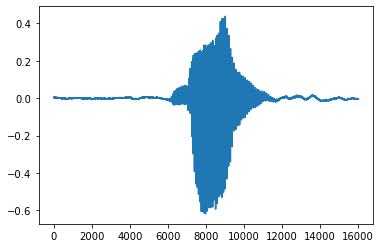

In [18]:
filename = "./data/SpeechCommands/speech_commands_v0.02/no/0b40aa8e_nohash_0.wav"
waveform, sample_rate = plot_audio(filename)
ipd.Audio(waveform.numpy(), rate=sample_rate)